In [1]:
import kagglehub

path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)


Path to dataset files: /home/mzums/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/home/mzums/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1/housing.csv")

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


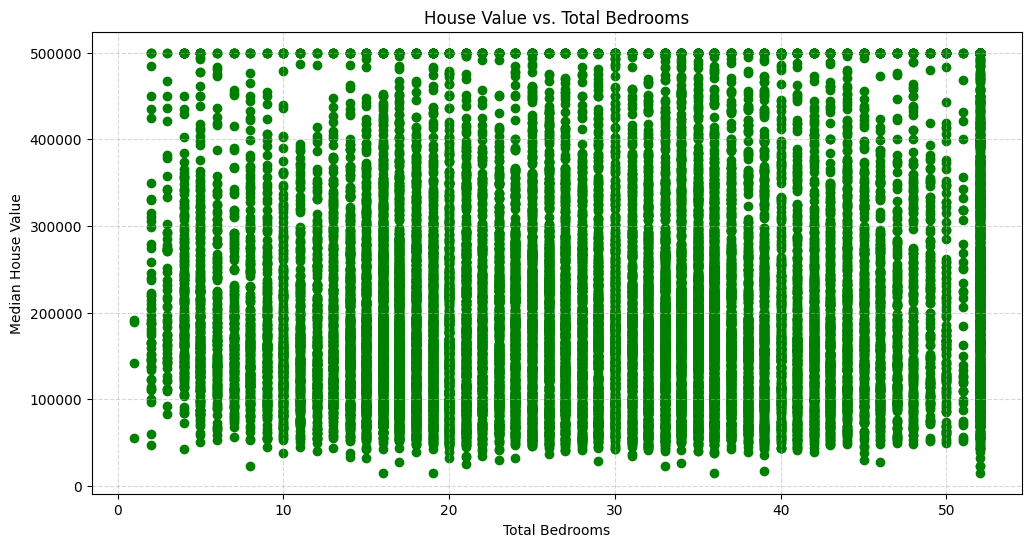

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(
    x=df['housing_median_age'],
    y=df['median_house_value'],
    c='green',
)
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.title('House Value vs. Total Bedrooms')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [6]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('rounder', FunctionTransformer(lambda x: np.round(x).astype(int))),
    ('scaler', StandardScaler())
])

df_imputed_num = num_pipeline.fit_transform(df[num_cols])
df_imputed_num = pd.DataFrame(df_imputed_num, columns=num_cols)

cat_cols = ['ocean_proximity']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df_clean = pd.concat([df_imputed_num, df[cat_cols]], axis=1)

print(df_clean.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
